El dataset *“Global AI Job Market & Salary Trends 2025”* reúne más de 15.000 ofertas de trabajo relacionadas con inteligencia artificial a nivel global.
Este conjunto de datos permite analizar cómo está evolucionando el mercado laboral de IA: qué roles son más demandados, qué salarios se están pagando, cómo varía según la región, la experiencia, las habilidades, etc.
Voy a utilizar este Dataset para analizar cómo se ve la IA en el mercado laboral y qué exigen las grandes empresas.

A continuación, les muestro las dos preguntas clave para la investigación:
1. ¿Cómo influye la adopción y especialización en inteligencia artificial en los salarios de los desarrolladores, considerando su nivel de experiencia y la región donde trabajan? Basado en: analizando el ***salario*** según el ***rol del desarrollador***, ***nivel de experiencia, ubicación geográfica*** y ***enfoque IA***.
2. ¿Qué habilidades relacionadas con IA están más asociadas a salarios más altos y mayor demanda laboral entre desarrolladores a nivel global?
Basado en: analizando ***skills, salario*** y **número de ofertas o frecuencia** de cada habilidad.

In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("bismasajjad/global-ai-job-market-and-salary-trends-2025")
os_path = os.path.abspath(path)
print("Path to dataset files:", os_path)
for file in os.listdir(os_path):
    if file.endswith('1.csv'):
        full_path = os.path.join(os_path, file)
        break

Using Colab cache for faster access to the 'global-ai-job-market-and-salary-trends-2025' dataset.
Path to dataset files: /kaggle/input/global-ai-job-market-and-salary-trends-2025


In [ ]:
import pandas as pd
import numpy as np
import kagglehub

ia_job = pd.read_csv(full_path)

In [ ]:
# Muestro las primeras filas
print(ia_job.head())

# Muestro los tipos del Dataset con el .info()
print(ia_job.info())

# Muestro las estadísticas numéricas
print(ia_job.describe())

# Muestro las columnas del Dataset para saber de qué se trata
print(ia_job.columns)

# Me fijo si hay nulos
print(ia_job.isnull().sum())

# Me fijo los tipos de datos que contiene el Dataset
print(ia_job.dtypes)

    job_id                 job_title  salary_usd salary_currency  \
0  AI00001            Data Scientist      219728             USD   
1  AI00002                Head of AI      230237             JPY   
2  AI00003             Data Engineer      128890             EUR   
3  AI00004  Computer Vision Engineer       96349             USD   
4  AI00005         Robotics Engineer       63065             EUR   

   salary_local experience_level employment_type company_location  \
0        219728               EX              PT           Sweden   
1      25326070               EX              PT            Japan   
2        109557               EX              CT          Germany   
3         96349               MI              FL          Finland   
4         53605               EN              FT           France   

  company_size employee_residence  remote_ratio  \
0            M             Sweden             0   
1            L              Japan            50   
2            S         

In [ ]:
# Reviso cuántos nulos tengo antes de borrar nada
print(ia_job[["salary_usd", "experience_level", "job_title"]].isnull().sum())

# Cantidad de filas antes de limpiar
print("Filas antes:", ia_job.shape[0])

# Limpieza básica: saco nulos y duplicados
ia_job = ia_job.dropna(subset=["salary_usd", "experience_level", "job_title"])
ia_job = ia_job.drop_duplicates()

# Ver cuántas filas quedaron
print("Filas después:", ia_job.shape[0])

# Identifico si el trabajo está relacionado con IA
ai_keywords = ["artificial intelligence", "machine learning", "deep learning",
               "computer vision", "nlp", "natural language processing", "ai", "ml", "dl"]

ia_job["rol_ia"] = ia_job["job_title"].apply(
    lambda x: "IA" if any(k in x.lower() for k in ai_keywords) else "No_IA"
)

# Cuántos roles IA vs No IA hay
print(ia_job["rol_ia"].value_counts())

salary_usd          0
experience_level    0
job_title           0
dtype: int64
Filas antes: 15000
Filas después: 15000
rol_ia
IA       9718
No_IA    5282
Name: count, dtype: int64


Pregunta 1: IA, experiencia y salario.
Quiero **analizar cómo influye trabajar en IA sobre el salario**, cruzando con **nivel de experiencia y región**.

In [ ]:
# Comparo -> IA vs NO IA (solo niveles altos)
ia_high = ia_job[ia_job["experience_level"].isin(["SE", "EX"])]
print("Salario promedio (IA vs NO IA) - Solo SE y EX:", ia_high.groupby("rol_ia")["salary_usd"].mean())

# IA vs NO IA cruzado por experiencia y región.
print("Impacto de IA en salario, cruzando experiencia y región:")

ia_exp_region = (ia_job.groupby(["rol_ia", "experience_level", "company_location"])["salary_usd"].mean().sort_values(ascending=False))

print(ia_exp_region)

Salario promedio (IA vs NO IA) - Solo SE y EX: rol_ia
IA       164355.251835
No_IA    162423.680224
Name: salary_usd, dtype: float64
Impacto de IA en salario, cruzando experiencia y región:
rol_ia  experience_level  company_location
No_IA   EX                Switzerland         284012.617647
IA      EX                Switzerland         279816.198582
No_IA   EX                Norway              264386.108108
                          Denmark             258218.112676
IA      EX                Norway              255577.725806
                                                  ...      
No_IA   MI                India                32870.160000
        EN                China                31688.757576
IA      EN                China                30796.283019
No_IA   EN                India                24629.607843
IA      EN                India                23577.275000
Name: salary_usd, Length: 160, dtype: float64


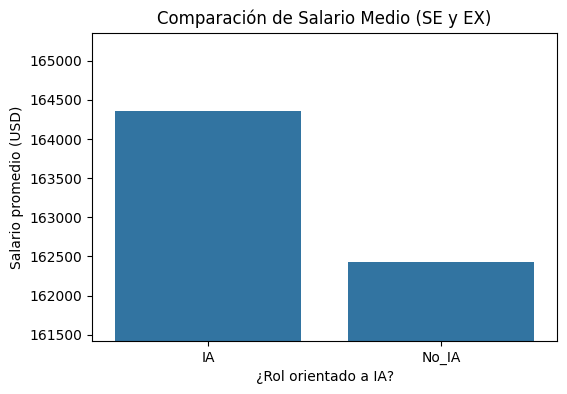

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

salarios = ia_high.groupby("rol_ia")["salary_usd"].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=salarios.index, y=salarios.values)

plt.ylim(salarios.min() - 1000, salarios.max() + 1000) # Agregué un "límite" o marqué un margen para que en el gráfico se pueda ver una diferencia.
# Busqué todas las maneras, y esta me resultó más sencilla porque no me modifica y sé que no me cambian los datos.

plt.title("Comparación de Salario Medio (SE y EX)")
plt.xlabel("¿Rol orientado a IA?")
plt.ylabel("Salario promedio (USD)")
plt.show()

Conclusión:
al enfocarnos solo en los niveles altos de seniority (SE y EX), la diferencia salarial se vuelve más evidente: los roles orientados a IA reciben salarios superiores frente a los roles no IA. Esto muestra que, a mayor especialización en IA, mayor es la brecha salarial y la demanda de estos perfiles avanzados.

/tmp/ipython-input-1511310907.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=ia_job, x="experience_level", y="salary_usd", estimator="mean", ci=None, order=["EN", "MI", "SE", "EX"], palette="viridis")
/tmp/ipython-input-1511310907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ia_job, x="experience_level", y="salary_usd", estimator="mean", ci=None, order=["EN", "MI", "SE", "EX"], palette="viridis")


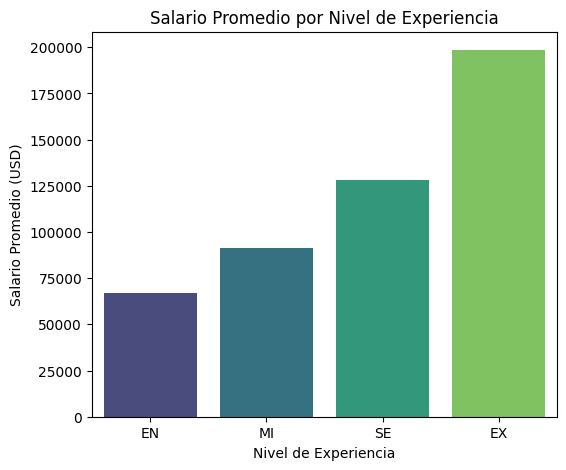

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))

sns.barplot(data=ia_job, x="experience_level", y="salary_usd", estimator="mean", ci=None, order=["EN", "MI", "SE", "EX"], palette="viridis")

plt.title('Salario Promedio por Nivel de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario Promedio (USD)')
plt.show()

Conclusión: al ordenar los niveles de experiencia, se observa claramente que el salario promedio aumenta de forma progresiva, mostrando una relación consistente entre mayor seniority y mejor remuneración.

/tmp/ipython-input-2070835527.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette = "viridis")


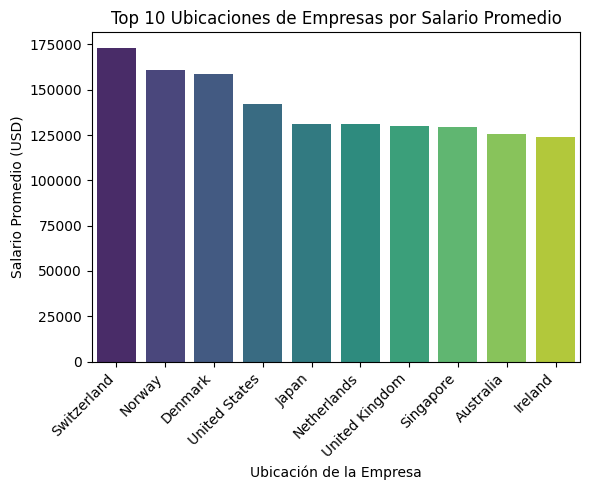

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización para la Pregunta 1 - Parte 3: Salario por Ubicación de la Empresa

# Salario promedio por Ubicación de la Empresa (Top 10)
plt.figure(figsize=(6, 5)) # Tamaño más pequeño
top_locations = ia_job.groupby("company_location")["salary_usd"].mean().sort_values(ascending=False).head(10) # Los primeros 10
sns.barplot(x=top_locations.index, y=top_locations.values, palette = "viridis")
plt.title('Top 10 Ubicaciones de Empresas por Salario Promedio')
plt.xlabel('Ubicación de la Empresa')
plt.ylabel('Salario Promedio (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Conclusión:
las ubicaciones del Top 10 ofrecen los **salarios más altos, mostrando que la región donde opera la empresa** influye fuertemente en la remuneración del desarrollador.

Pregunta 2: Habilidades y salario.
Quiero analizar **qué skills relacionadas con IA** están más asosciadas a **mejores salarios y mayor presencia en el mercado**.

In [ ]:
# Separo y me enfoco en las habilidades reales
skills_df = ia_job.copy()
skills_df["skill"] = skills_df["required_skills"].fillna("").astype(str).str.split(",")
skills_df = skills_df.explode("skill")
skills_df["skill"] = skills_df["skill"].str.strip()

# Calculo el salario promedio por habilidad
salario_por_skill = skills_df.groupby("skill")["salary_usd"].mean().sort_values(ascending=False)

# Muestro las 10 habilidades mejor pagadas
print(salario_por_skill.head(10))

# Calculo la frecuencia de cada habilidad
frecuencia_por_skill = skills_df["skill"].value_counts()

# Muestro las 10 habilidades más frecuentes
print("\nTop 10 habilidades más frecuentes:")
print(frecuencia_por_skill.head(10))

skill
Hadoop                123493.190781
Scala                 123270.812227
Python                123141.083796
Spark                 123122.927120
Docker                122709.647614
Data Visualization    122603.961741
R                     122599.624893
PyTorch               122396.598022
Azure                 122354.898456
SQL                   122082.195101
Name: salary_usd, dtype: float64


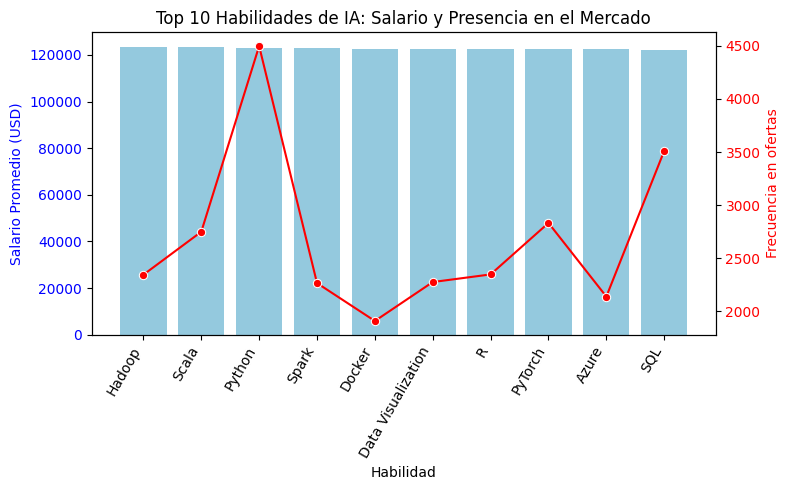

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combino salario promedio con frecuencia
skill_analysis = pd.DataFrame({
    "average_salary": salario_por_skill,
    "frequency": frecuencia_por_skill
}).dropna()

# Selecciono las 10 habilidades mejor pagadas
top10 = skill_analysis.sort_values(by="average_salary", ascending=False).head(10)

plt.figure(figsize=(8, 5))
ax1 = sns.barplot(x=top10.index, y=top10["average_salary"], color="skyblue")
ax1.set_ylabel("Salario Promedio (USD)", color="blue")
ax1.set_xlabel("Habilidad")
ax1.set_title("Top 10 Habilidades de IA: Salario y Presencia en el Mercado")
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=60, ha='right')

# Para frecuencia
ax2 = ax1.twinx()
sns.lineplot(x=top10.index, y=top10["frequency"], color="red", marker="o", ax=ax2)
ax2.set_ylabel("Frecuencia en ofertas", color="red")
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

Conclusión:
el gráfico indica que Python, SQL, y PyTorch son las skills más demandadas del mercado. Aunque todas las habilidades pagan el mismo salario máximo, la alta demanda de PyTorch ejemplifica el mejor equilibrio entre la máxima paga y la presencia laboral.